In [78]:
## System datascience technical screen

Candidate Name:  Buyan FEI
Date: 06/13/2019

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [57]:
#Are there any regional health trends?
cdc = pd.read_csv("500_cities_cdc_data.csv")
cdc_m = pd.read_csv("500_cities_cdc_measures.csv")
df = cdc
df_m = cdc_m
df["x"] = df["Geolocation"].str.slice(1,15)
df["x"] = pd.to_numeric(df["x"],errors = "ignore")
df["y"] = df["Geolocation"].str.slice(17,31)
df["y"] = pd.to_numeric(df["y"],errors = "ignore")
df[:1]

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,...,MHLTH_AdjPrev,OBESITY_AdjPrev,PAPTEST_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,Geolocation,x,y
0,AL,Birmingham,107000,212237,21.4,32.6,11.4,45.9,70.5,6.1,...,17.0,39.0,80.1,18.3,46.9,5.0,25.9,"(33.52756637730, -86.7988174678)",33.527566,-86.798817


In [3]:
print(df_m["Measure"][4])

Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure


Current lack of health insurance among adults aged 18–64 Years


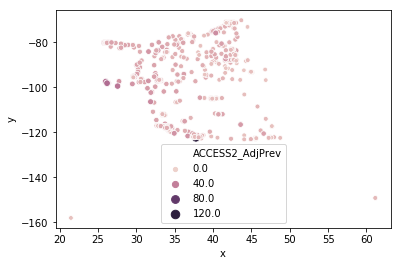

In [4]:
print(df_m["Measure"][0])
sns.scatterplot(x="x", y="y", hue=df.columns[4], size= df.columns[4],  data=df)
plt.show()


Arthritis among adults aged >=18 Years


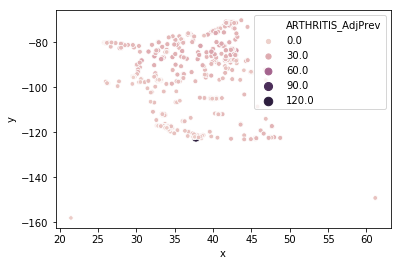

In [5]:
print(df_m["Measure"][1])
sns.scatterplot(x="x", y="y", hue=df.columns[5], size=df.columns[5],  data=df)
plt.show()

Binge drinking among adults aged >=18 Years


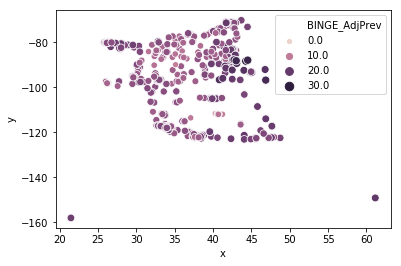

In [6]:
print(df_m["Measure"][2])
sns.scatterplot(x="x", y="y", hue=df.columns[6], size=df.columns[6],  data=df)
plt.show()

High blood pressure among adults aged >=18 Years


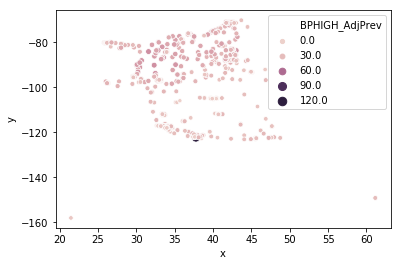

In [7]:
print(df_m["Measure"][3])
sns.scatterplot(x="x", y="y", hue=df.columns[7], size=df.columns[7],  data=df)
plt.show()

Current lack of health insurance among adults aged 18–64 Years


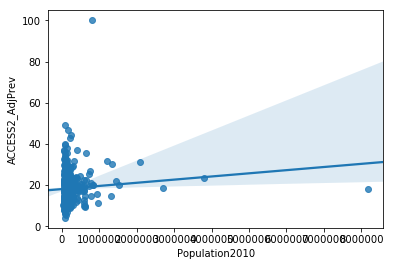

In [8]:
#Which are healthier, larger or smaller cities?
print(df_m["Measure"][0])
ax = sns.regplot(x=df.columns[3], y=df.columns[4],data=df)
plt.show()

Current lack of health insurance among adults aged 18–64 Years


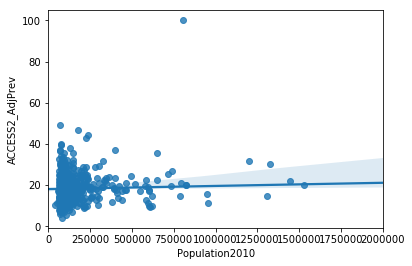

In [15]:
#change x limit
print(df_m["Measure"][0])
ax = sns.regplot(x=df.columns[3], y=df.columns[4],data=df)
plt.xlim(0, 2000000)
plt.show()

Arthritis among adults aged >=18 Years


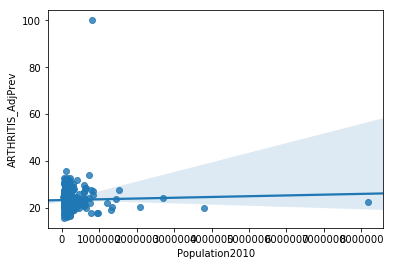

In [9]:
print(df_m["Measure"][1])
ax = sns.regplot(x=df.columns[3], y=df.columns[5],data=df)
plt.show()

Arthritis among adults aged >=18 Years


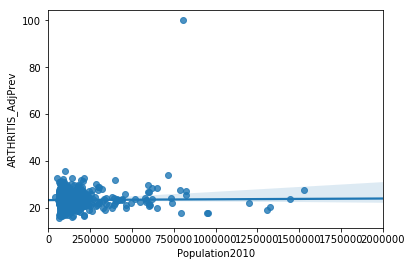

In [16]:
print(df_m["Measure"][1])
ax = sns.regplot(x=df.columns[3], y=df.columns[5],data=df)
plt.xlim(0, 2000000)
plt.show()

Binge drinking among adults aged >=18 Years


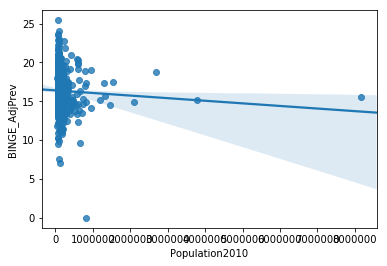

In [10]:
print(df_m["Measure"][2])
ax = sns.regplot(x=df.columns[3], y=df.columns[6],data=df)
plt.show()

High blood pressure among adults aged >=18 Years


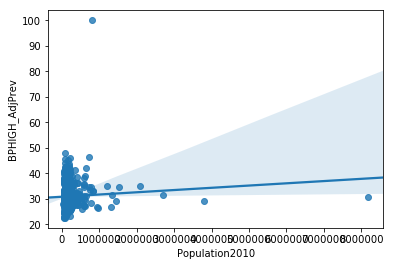

In [11]:
print(df_m["Measure"][3])
ax = sns.regplot(x=df.columns[3], y=df.columns[7],data=df)
plt.show()

Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure


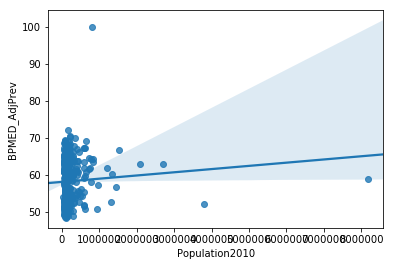

In [17]:
print(df_m["Measure"][4])
ax = sns.regplot(x=df.columns[3], y=df.columns[8],data=df)
plt.show()

Cancer (excluding skin cancer) among adults aged >=18 Years


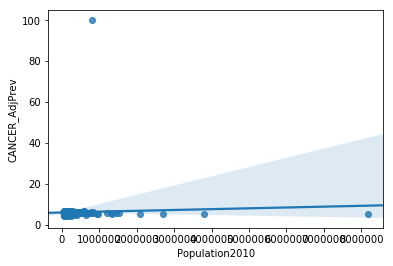

In [18]:
print(df_m["Measure"][5])
ax = sns.regplot(x=df.columns[3], y=df.columns[9],data=df)
plt.show()

In [ ]:
#If you split the data by geography, can you predict the health of neighboring cities?
#kNN
from sklearn.neighbors import KNeighborsClassifier
#assume 4 cities on each direction
knn = KNeighborsClassifier(n_neighbors=4)
train_X = df["x"]
target = df.columns[4:34]
knn.fit(train_X, target)
predict_x = knn.predict(given_x)




    

In [49]:
### Correlation
#Explore the 500 Cities dataset to help policy makers understand what **Prevention** measures may decrease bad **Health Outcomes** in the population. Feel free to focus on specific **Health Outcome(s)** of your choice.
from sklearn import linear_model
import statsmodels.api as sm
dependents = df_m.loc[df_m['Category'] == "Prevention"]
dependents

,MeasureId,Measure,CategoryID,Category
0,ACCESS2,Current lack of health insurance among adults ...,PREVENT,Prevention
4,BPMED,Taking medicine for high blood pressure contro...,PREVENT,Prevention
8,CHECKUP,Visits to doctor for routine checkup within th...,PREVENT,Prevention
9,CHOLSCREEN,Cholesterol screening among adults aged >=18 Y...,PREVENT,Prevention
10,COLON_SCREEN,"Fecal occult blood test, sigmoidoscopy, or col...",PREVENT,Prevention
12,COREM,Older adult men aged >=65 Years who are up to ...,PREVENT,Prevention
13,COREW,Older adult women aged >=65 Years who are up t...,PREVENT,Prevention
15,DENTAL,Visits to dentist or dental clinic among adult...,PREVENT,Prevention
20,MAMMOUSE,Mammography use among women aged 50–74 Years,PREVENT,Prevention
23,PAPTEST,Papanicolaou smear use among adult women aged ...,PREVENT,Prevention


In [48]:
independents = df_m.loc[df_m['Category'] == "Health Outcomes"]
independents[:1]

,MeasureId,Measure,CategoryID,Category
1,ARTHRITIS,Arthritis among adults aged >=18 Years,HLTHOUT,Health Outcomes


In [55]:
#build multi linear regression model
X = df[['ACCESS2_AdjPrev','BPMED_AdjPrev','CHECKUP_AdjPrev','CHOLSCREEN_AdjPrev','COLON_SCREEN_AdjPrev','COREM_AdjPrev','COREW_AdjPrev','DENTAL_AdjPrev','MAMMOUSE_AdjPrev','PAPTEST_AdjPrev']]
Y = df['ARTHRITIS_AdjPrev']
regr0 = linear_model.LinearRegression()
regr0.fit(X, Y)
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model0 = sm.OLS(Y, X).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ARTHRITIS_AdjPrev   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     258.5
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          4.74e-188
Time:                        11:47:15   Log-Likelihood:                -1043.6
No. Observations:                 500   AIC:                             2109.
Df Residuals:                     489   BIC:                             2155.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.2743      3.627      9.727      0.000      28.149      42.400
ACCESS2_AdjPrev         -0.2196      0.025     -8.826      0.000      -0.268      -0.171
BPMED_AdjPrev            0.2655      0.034      7.727      0.000       0.198       0.333
CHECKUP_AdjPrev         -0.0130      0.035     -0.373      0.709      -0.082       0.056
CHOLSCREEN_AdjPrev      -0.0462      0.049     -0.937      0.349      -0.143       0.051
COLON_SCREEN_AdjPrev     0.4129      0.047      8.732      0.000       0.320       0.506
COREM_AdjPrev            0.2117      0.034      6.300      0.000       0.146       0.278
COREW_AdjPrev           -0.2423      0.032     -7.457      0.000      -0.306      -0.178
DENTAL_AdjPrev          -0.4695      0.029    -16.016      0.000      -0.527      -0.412
MAMMOUSE_AdjPrev        -0.0043      0.045     -0.095      0.924      -0.093       0.084
PAPTEST_AdjPrev         -0.1858      0.043     -4.329      0.000      -0.270      -0.101
==============================================================================
Omnibus:                       40.910   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.462
Skew:                           0.647   Prob(JB):                     2.46e-12
Kurtosis:                       3.944   Cond. No.                     7.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#large p-value means insignificant: CHECKUP, CHOLSCREEN, MAMMOUSE.
#positive coefficients means not preventing outcomes: BPMED, COLON_SCREEN,COREM,

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ARTHRITIS_AdjPrev   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     370.1
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.67e-191
Time:                        11:48:12   Log-Likelihood:                -1044.4
No. Observations:                 500   AIC:                             2105.
Df Residuals:                     492   BIC:                             2139.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.9176      3.147     11.094      0.000      28.734      41.101
ACCESS2_AdjPrev         -0.2255      0.023     -9.643      0.000      -0.271      -0.180
BPMED_AdjPrev            0.2461      0.022     10.970      0.000       0.202       0.290
COLON_SCREEN_AdjPrev     0.3821      0.029     13.377      0.000       0.326       0.438
COREM_AdjPrev            0.2237      0.029      7.716      0.000       0.167       0.281
COREW_AdjPrev           -0.2338      0.031     -7.562      0.000      -0.295      -0.173
DENTAL_AdjPrev          -0.4711      0.029    -16.183      0.000      -0.528      -0.414
PAPTEST_AdjPrev         -0.2062      0.033     -6.309      0.000      -0.270      -0.142
==============================================================================
Omnibus:                       39.228   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.698
Skew:                           0.631   Prob(JB):                     9.79e-12
Kurtosis:                       3.916   Cond. No.                     5.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

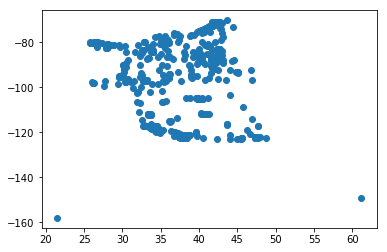

In [79]:
### Clustering
#Analyze similarities between cities and cluster cities with similar health patterns.
#k-means
df_c = df.drop(["Geolocation"], axis=1)
features = df_c.iloc[:,2:34]
scatter(x="x", y="y",  data=features)


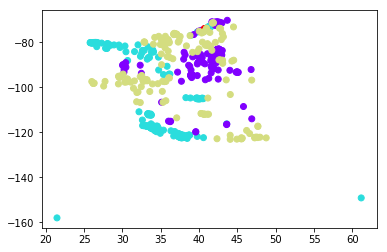

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=4, n_init=100)
kmeans.fit(features)
scatter(x="x", y="y", data=features,c=kmeans.labels_,cmap=cm.rainbow);
